In [130]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load in the Data
data = pd.read_csv("./data/spotify_millsongdata.csv")

# Split test set
data, data_test = train_test_split(data, test_size = .8)

columns = ['artist', 'song', "text"]
data = data.loc[:, ['artist', 'song',"text"]]


# Turn text lower case and remove punctuation
data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')
data_copy = data.copy(deep=True) # save a copy of the data in solid string form
data["text"] = data["text"].str.strip().str.split() #remove unnecessary spaces and turn into a list of words

# Preview the data before modifying it
print(data.shape)
data_copy.head()
data.head()
# Divide the data into the response (artist) versus the words
# X_full, y_full = data.copy().drop(['song', 'artist'], axis=1), data["artist"]


/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_37894/2710371876.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')


(11530, 3)


,artist,song,text
6203,Fleetwood Mac,Revelation,"[he, had, all, the, rivers, under, his, power,..."
13902,New Order,Guilty Partner,"[listen, to, me, i, know, what, im, saying, bu..."
52052,Status Quo,Again And Again,"[once, upon, a, time, not, so, very, long, ago..."
38984,Judas Priest,Tyrant,"[behold, tis, i, the, commander, whose, grip, ..."
42809,Marianne Faithfull,Once I Had A Sweetheart,"[once, i, had, a, sweetheart, and, now, i, hav..."


---
# EXPLORING THE DATA
To explore the data, I processed it in different ways that would support my goal of predicting the artist based on the words in their song.
Initially, the data just has each artist, the song title, and the song lyrics for that entire song. In order to process the data, I used a Bag-of-words, technique, to make new features for the counts of each word in the song.  


### 1. **Visualizing word frequencies across all songs in the data set**
To visualize word frequencies, I used two methods: a bar chart and a word cloud. The bar chart helps us easily see the most frequent words. This includes words like "the" and "i" which we would expect to be very frequent. The word cloud was just for fun, but it does give some visual intuition on the difference between different artists. 


### 2. **Visualizing word counts of all artists**
I added a feature in the data of the word count for each song. 
I then plotted a bar plot of artists to the average number of words in their songs. I thought this feature would be interesting as some artists (ex: rap artists) might have more words on average than others. It could also be interesting to visualize the number of unique words used by the artist.

### 3. **Narrowing the data in on a subset of artists**
-  ** Visualizing word frequencies for all the songs made by the selected artists**
-  ** Visualizing word frequencies for a single artist**
- For both of the above visualizations, I used the same methods as in (1).


### 4. **Determining what word counts to add as features**
- **When to standardize?** - one question I delt with was when to standardize the data. Because my data has text in a condensed form, I would first need to select a subset of words to add as features containing their word count (this is due to there being over 20,000 unique words in all songs) before standardizig. One idea I had was to just use the top 1,000 words across all the songs. However, one concern I had was whether this would just prioritize words that are in general common in English and not words that would help differentiate between artists since I couldn't standardize before selecting this initial set of features.
- **Initial features/word selection rationale:** Because my goal is to predict the artist given a particular song / lyrics of the song, I decided to just add all the words in the selected artists dataset and then standardize the data. 
- After standardizing each column, I'll later perform **dimension reduction** to reduce the overall size of the feature space of the data set. It makes sense to do dimension reduction as words are likely correlated (ex: words like "i" might be correlated with "you"), and also we have a very large p>>, so for computational reasons this is a good idea. 

### 5. **Visualizing the new feature distributions** (histogram of the Bag-Of-Words columns across all data) 
I also visualized the word distributions and word correlations to get more insight into the words themselves.

In [99]:
# Word Visualization Helper Functions
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import operator
def get_word_counts(data, artist = None):
    """
    Gets the word counts for a given name in the data in a dictionary
    """
    if artist == None:
        artist_data = data
    else:
        artist_data = data[data_copy["artist"] == artist]
    word_counts = data.copy().text.str.split(expand=True).stack().value_counts().reset_index()
    word_counts.columns = ['Word', 'Count']
    
    return dict(zip(word_counts['Word'].tolist(), word_counts['Count'].tolist()))

def plot_artist_words(data, artist = None):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,7))
    word_dict = get_word_counts(data, artist)

    #plot the word bar plot
    top_word_counts = dict(sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)[:20])
    ax1.bar(top_word_counts.keys(), top_word_counts.values())
    ax1.set_title(artist)

    #plot the word cloud
    word_cloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 100).generate_from_frequencies(word_dict)
    ax2.imshow(word_cloud)
    ax2.set_title(artist)
    plt.show()

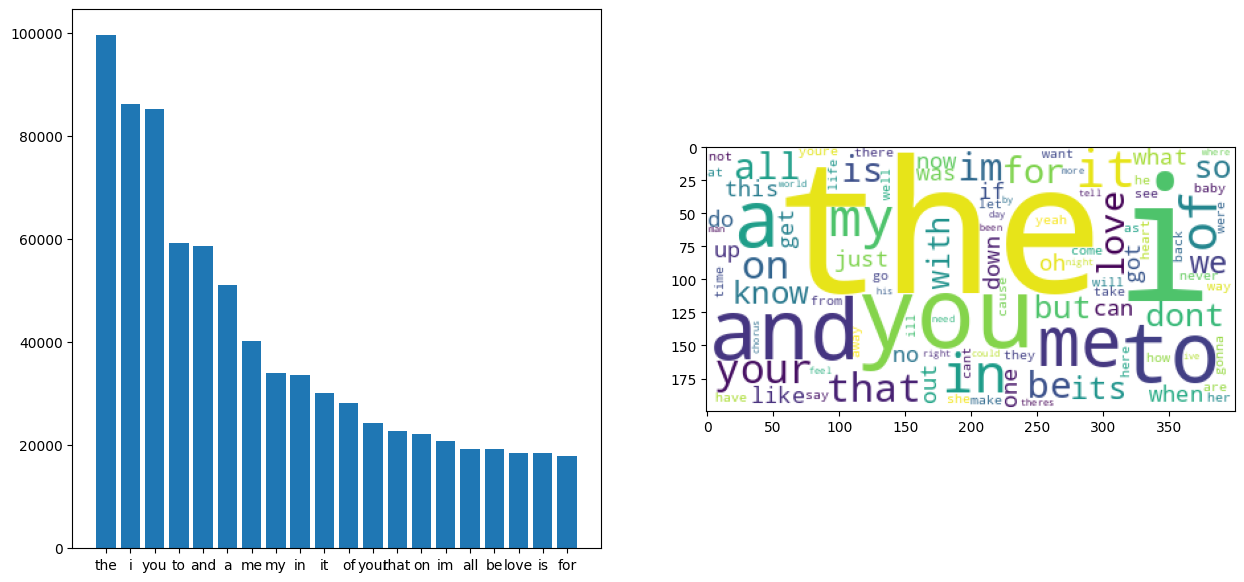

         artist                                           song_wcs  \
0       'n Sync  [220, 239, 279, 233, 186, 155, 361, 346, 323, ...   
1          ABBA  [288, 223, 356, 168, 304, 256, 542, 185, 281, ...   
2   Ace Of Base  [225, 163, 241, 148, 309, 350, 293, 274, 178, ...   
3  Adam Sandler  [110, 116, 493, 283, 171, 219, 317, 201, 129, ...   
4         Adele  [89, 273, 418, 253, 269, 286, 450, 517, 223, 4...   

   avg_song_wc  
0   287.500000  
1   258.750000  
2   229.933333  
3   220.307692  
4   326.833333  


/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_37894/3590224441.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_lengths_df["avg_song_wc"].iloc[[i]] = avg


<AxesSubplot:ylabel='Frequency'>

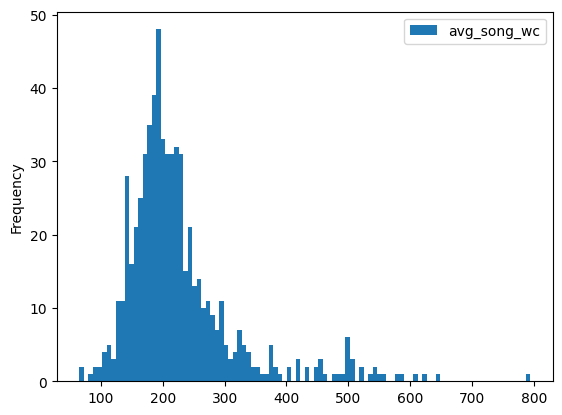

In [114]:
# 1. Visualizing word frequencies across all songs in the data set
plot_artist_words(data_copy)

# 2. Visualizing word counts of all artists
data["song_wc"] = [len(lyrics) for lyrics in data['text'].tolist()] # word counts

# group the word counts of each song by artist and average
song_lengths_df = data.copy().groupby("artist")["song_wc"].apply(list).reset_index(name = "song_wcs")

song_lengths_df["avg_song_wc"] = 0
for i in range(len(song_lengths_df["song_wcs"])):
    song_wcs = song_lengths_df["song_wcs"].iloc[[i]]
    song_wcs = song_wcs.tolist()[0]
    avg = sum(song_wcs)/ len(song_wcs)
    song_lengths_df["avg_song_wc"].iloc[[i]] = avg
print(song_lengths_df.head())

song_lengths_df.plot.hist(column = "avg_song_wc", bins = 100)

In [132]:
# Modify the data for a selected subset of the artists
artists = ["Eminem", "Metallica", "Rihanna", "Taylor Swift"]

def subset_data(data_full, classes):
    """
    take a subset of the data that corresponds to the values in the list, classes
    """
    cols = data_full.columns
    array_data = data_full.to_numpy()

    # copy over data entries corresponding to the correct author
    X, y = [], []
    subset_data = []
    for i in range(len(data)):
        artist = data_full['artist'].values[i]
        if artist in artists:
            subset_data.append(array_data[i])

    return pd.DataFrame(subset_data, columns = cols)

# Get the artist data set
data_artists = subset_data(data_copy, artists)
data_artists.head()


,artist,song,text
0,Rihanna,Here I Go Again,its been a minute since i saw you boy \r\nlik...
1,Metallica,Eye Of The Beholder,do you see what i see \r\ntruth is an offense...
2,Rihanna,Ice,wait \r\nyou aint even thinking what you say ...
3,Taylor Swift,Never Grow Up,your little hands wrapped around my finger \r...
4,Taylor Swift,Our Song,i was riding shotgun with my hair undone in th...


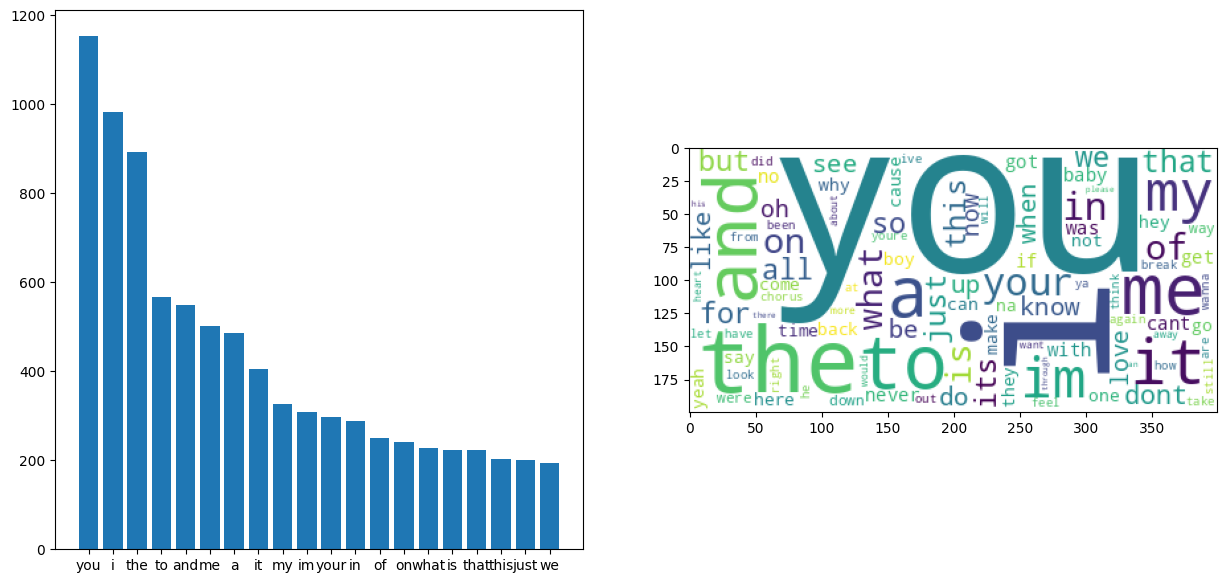

Eminem  : num songs =  14


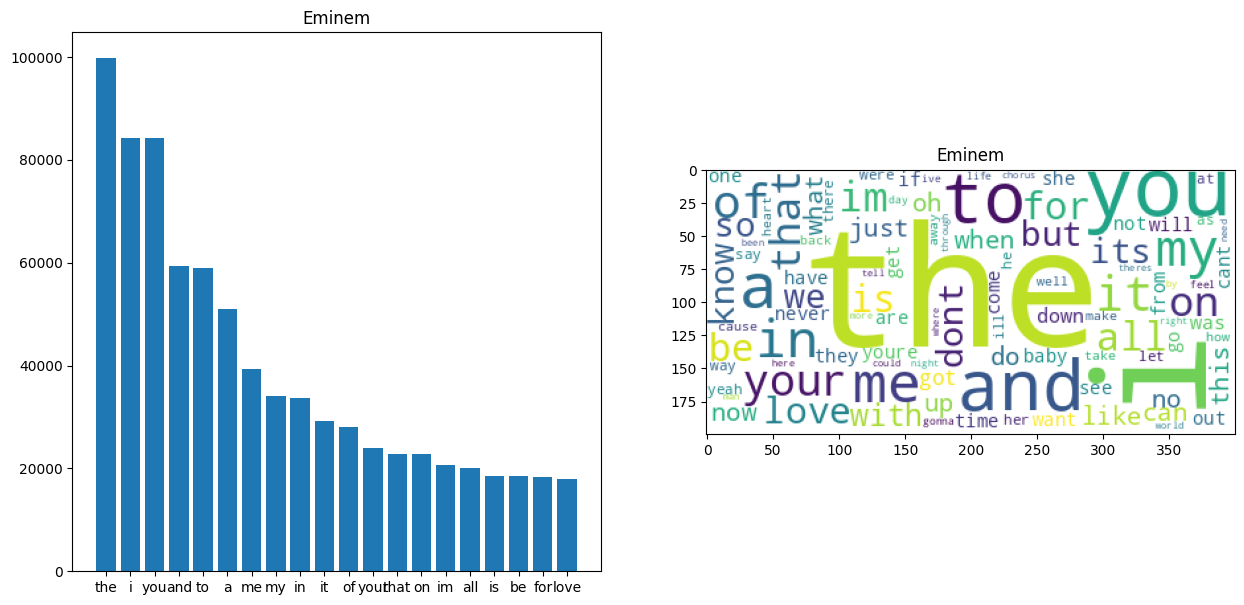

Metallica  : num songs =  23


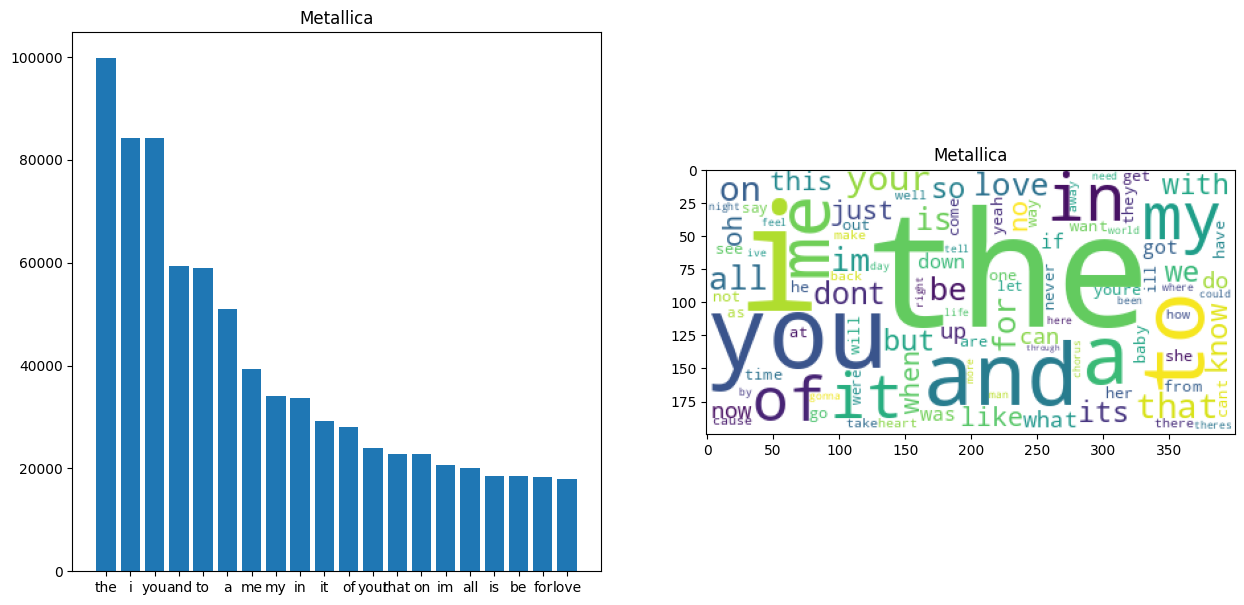

Rihanna  : num songs =  27


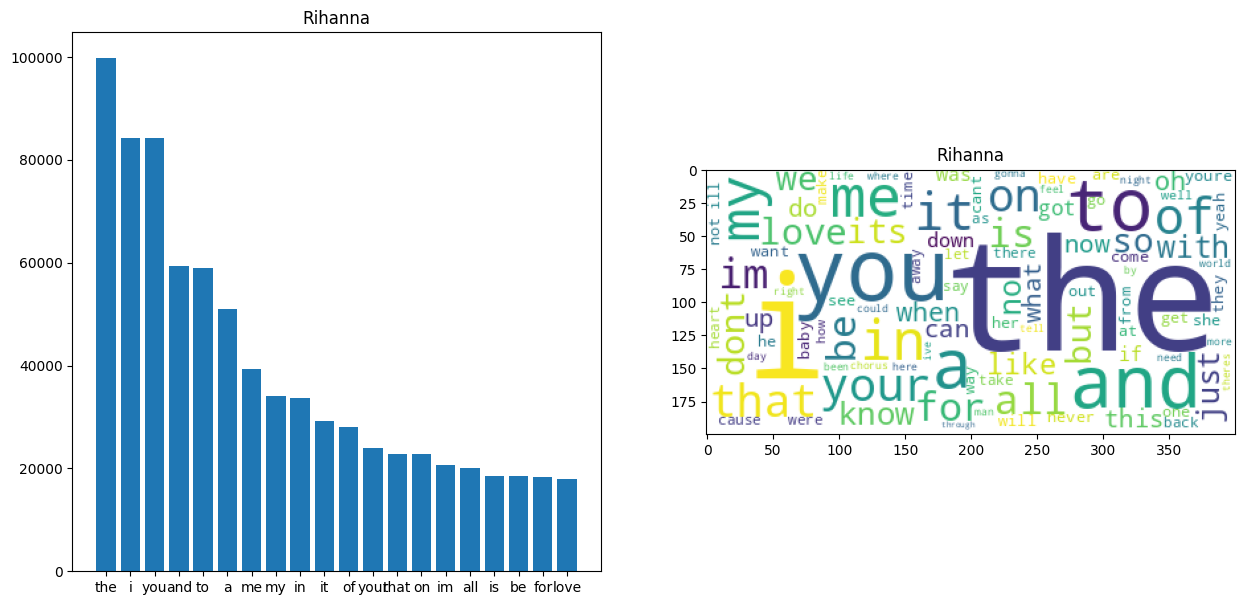

Taylor Swift  : num songs =  18


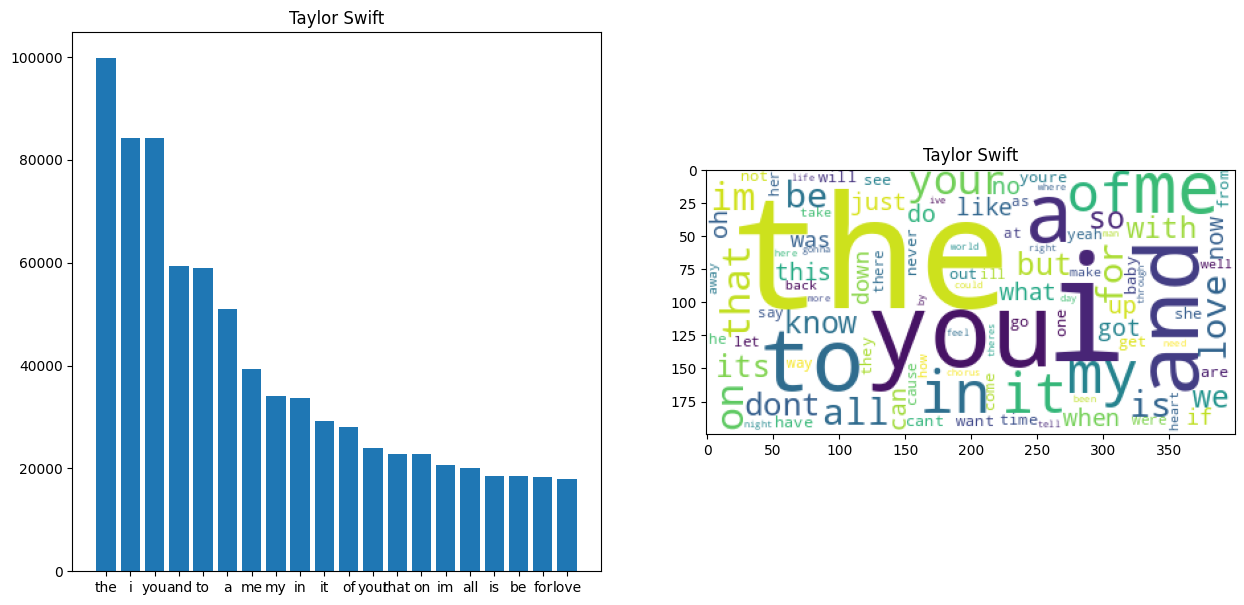

In [134]:
# 3. Artist specific visualizations
# Visualizing word frequencies for all the songs made by the selected artists
plot_artist_words(data_artists) 

# Visualizing word frequencies for a single artist (do for each selected artist)
for artist in artists:
    print(artist," : num songs = ", list(data["artist"]).count(artist))
    plot_artist_words(data_copy, artist)

In [144]:
# 4. Determining what word counts to add as features (this cell takes awhile to run)
from sklearn.preprocessing import StandardScaler

# get the unique words in the artist data in a dataframe corresponding to the word counts
word_count_data = data_artists.copy().text.str.split(expand=True).stack().value_counts().reset_index()
word_count_data.columns = ['Word', 'Count']
word_list  = word_count_data['Word'].tolist()

words = word_list[:100] # use the top 1000 words as features

# add the unique words as features
for word in words:
    data_artists[word] =  data_artists["text"].map(lambda x: x.count(word))

# divide the data into the response / features
X, y = data_artists.drop(['song', 'artist', 'text'], axis = 1), data_artists['artist']
X.head()


/var/folders/tt/3pycs2310q194f1lhy4x0m840000gn/T/ipykernel_37894/1184524851.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_artists[word] =  data_artists["text"].map(lambda x: x.count(word))


,you,i,the,to,and,me,a,it,my,im,...,want,more,about,heart,would,please,his,through,there,an
0,16,107,17,8,6,22,93,14,2,2,...,1,0,0,1,0,0,0,1,0,14
1,40,103,11,5,2,3,76,19,4,5,...,2,1,0,0,0,0,1,1,0,10
2,27,124,11,14,8,27,85,8,7,16,...,3,1,0,0,0,0,2,3,1,28
3,44,98,11,11,12,9,76,19,4,4,...,2,0,0,2,1,1,6,0,1,20
4,8,103,20,4,20,9,141,10,5,1,...,0,0,0,1,0,0,4,0,0,24


<AxesSubplot:ylabel='Frequency'>

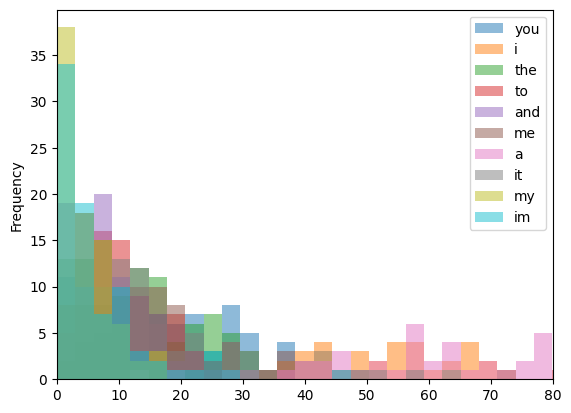

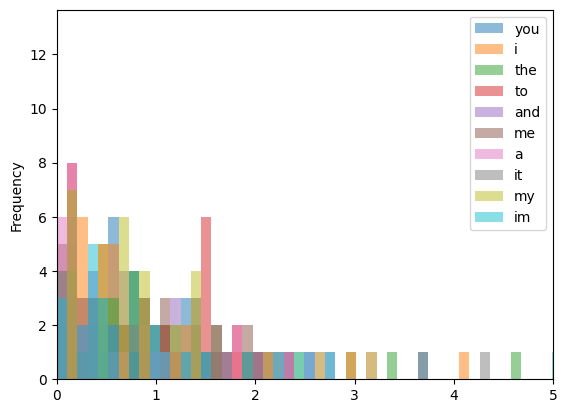

In [145]:
# 5. Standardize the data
# Plot the distributions of the top 100 words in a histogram
top_unstandardized_words = list(word_count_data['Word'])[:10]
X.plot.hist(column = top_unstandardized_words, bins=100, alpha=0.5, xlim =(0,80))

# Standardize the data
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)
X_scaled.plot.hist(column = top_unstandardized_words[:10], bins=100, alpha=0.5, xlim =(0,5)) #re-plot the distribution of the top words

In [ ]:
# Modify the text data and Standardize
from sklearn.preprocessing import StandardScaler
# Turn text lower case and remove punctuation
data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')
data_copy = data.copy() # save a copy of the data in solid string form
data["text"] = data["text"].str.strip().str.split() #remove unnecessary spaces and turn into a list of words

# Create a new dataframe with word frequencies of all words in the dataframe
word_count_data = data_copy.copy().text.str.split(expand=True).stack().value_counts().reset_index()
word_count_data.columns = ['Word', 'Count']

# Visualize the distributions of words accross authors / standardize data
top_unstandardized_words = list(word_count_data['Word'])[:100] # determine the top 1000 word counts as features
X.plot.hist(column = top_unstandardized_words[:10], bins=100, alpha=0.5, xlim =(0,80)) #plot the distribution of the top words


# Standardize the data
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)

X_scaled.plot.hist(column = top_unstandardized_words[:10], bins=100, alpha=0.5, xlim =(0,5)) #re-plot the distribution of the top words


In [ ]:
# Process the Song Lyrics
# Turn text lower case and remove punctuation
data["text"] = data["text"].str.lower().str.replace('[^\w\s]','')
data_copy = data.copy() # save a copy of the data in solid string form
data["text"] = data["text"].str.strip().str.split() #remove unnecessary spaces and turn into a list of words


# Add Features to the data
# top_words = list(word_count_data['Word'])[:100] # determine the top 1000 word counts as features
data["total_words"] = [len(lyrics) for lyrics in data['text'].tolist()] # word counts
for word in top_words:
    data[word] =  data["text"].map(lambda x: x.count(word))
print("\n\n===== Data With Word Counts ====\n", data.head(), "\n data shape:", data.shape)



In [ ]:
# 2. Standardize the Data
from sklearn.preprocessing import StandardScaler

# Visualize the distributions of words accross authors / standardize data
X.plot.hist(column = top_words[:10], bins=100, alpha=0.5, xlim =(0,80))

# Standardize the data
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns = X.columns)

X_scaled.plot.hist(column = top_words[:10], bins=100, alpha=0.5, xlim =(0,5))


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import operator

def get_word_counts(artist = None):
    """
    Gets the word counts for a given name in the data in a dictionary
    """
    if artist == None:
        artist_data = data_copy
    else:
        artist_data = data_copy[data_copy["artist"] == artist]
    word_counts = artist_data.copy().text.str.split(expand=True).stack().value_counts().reset_index()
    word_counts.columns = ['Word', 'Count']
    
    return dict(zip(word_counts['Word'].tolist(), word_counts['Count'].tolist()))

def plot_artist_words(artist = None):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,7))
    word_dict = get_word_counts(artist)

    #plot the word bar plot
    top_word_counts = dict(sorted(word_dict.items(), key=operator.itemgetter(1), reverse=True)[:20])
    ax1.bar(top_word_counts.keys(), top_word_counts.values())
    ax1.set_title(artist)

    #plot the word cloud
    word_cloud = WordCloud(background_color = 'white', stopwords = STOPWORDS, max_words = 100).generate_from_frequencies(word_dict)
    ax2.imshow(word_cloud)
    ax2.set_title(artist)
    plt.show()

# Create a word cloud and bar chart of all of the words in the songs
plot_artist_words()

# # Sort the artists by the number of songs in the database
# artists = list(set(data["artist"])) # unique artist list
# artists_sorted = sorted(artists, key = lambda x: list(data["artist"]).count(x), reverse = True)

# # Preview the word counts of artists ranging in "popularity"
for artist in artists:
    print(artist," : num songs = ", list(data["artist"]).count(artist))
    plot_artist_words(artist)


In [ ]:
from sklearn.decomposition import PCA, NMF
from sklearn.manifold import TSNE
from matplotlib.lines import Line2D

# ---------------- Helper Functions----------------

def get_color_array(labels, y):
    """ 
    Get a color array corresponding a color to each label
    """
    label_colors = {}
    cmap = plt.get_cmap('Spectral')
    colormap = cmap(np.linspace(0, 1, len(labels))) #colors for each label
    for i, label in enumerate(labels):
        label_colors[label] = colormap[i]
    color_array = [label_colors[label] for label in y]
    return color_array, label_colors

# ---------------- More Data Processing ----------------

# 2. Map artists to colors for plotting purposes
color_array, artist_colors = get_color_array(artists, y)

# ---------------- PCA Helper Functions----------------
def viz_2Dembedding(X_embedded, model_name):
    plt.scatter(X_embedded[:,0], X_embedded[:,1], c = color_array)
    custom_points = [Line2D([0], [0] , color = artist_colors[artist] , lw = 4) for artist in artists]
    plt.legend(custom_points, artists)
    
    plt.xlabel("component 0")
    plt.ylabel("component 1")
    plt.title("Artist Words")

    plt.title(model_name + " Visualization")
    plt.show()
    plt.clf()

def viz_feature_weights(features, feature_weights, model_name):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
    ax1.bar(features, feature_weights[0][:len(features)])
    ax1.set_title("feature 1 weights")
    ax1.set_ylabel("feature weights")
    ax1.set_xlabel("words")

    ax2.bar(features, feature_weights[1][:len(features)])
    ax2.set_title("feature 2 weights")
    ax2.set_ylabel("feature weights")
    ax2.set_xlabel("words")
    plt.suptitle(model_name + " Features")
    plt.show()
    plt.clf()


In [ ]:
# UNSUPERVISED LEARNING / EXPLORING THE DATA
words_to_viz = top_words[:20]

# PCA Embedding
model = PCA(n_components = 2)
X_embedded = model.fit_transform(X)
viz_2Dembedding(X_embedded, "PCA")
viz_feature_weights(words_to_viz, model.components_, "PCA")

# # NMF Embedding
# model = NMF(n_components = 2)
# X_embedded = model.fit_transform(X)
# viz_2Dembedding(X_embedded, "NMF")
# viz_feature_weights(words_to_viz, model.components_, "NMF")

#tSNE Embedding
model = TSNE(n_components = 2)
X_embedded = model.fit_transform(X)
viz_2Dembedding(X_embedded, "tSNE")
